# CS6220 Data Mining Techniques - Final Project

# Black Friday Sales Purchase Prediction


<ul>
    <li><b><h3> Suhani Ladani (ladani.s@husky.neu.edu)</h3></b></li>
    <li><b><h3> Naomi Machado (machado.n@husky.neu.edu) </h3></b></li>
    <li><b><h3> Naga Sai Anirudh Upadhyayula (upadhyayula.n@husky.neu.edu) </h3></b></li>
</ul>

## 1. Libraries

In [1]:
# Basic libraries for data manipulation and analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Libraries for plotting data
import plotly.tools as tls
import plotly.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

import cufflinks as cf
# print(cf.__version__)

# Libraries for Regression Models

# Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree based Regression Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Libraries to evaluate model metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Library to split train and test data
from sklearn.model_selection import train_test_split

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='NaomiMachado',api_key='4BHQNShvzY23VXSO41qj')
# -------------------------------------------------------------------------

## 2. Data Analysis

In [2]:
# Import the dataset using pandas; BlackFridayTrain now contains the dataframe
BlackFridayTrain = pd.read_csv('train.csv')

In [3]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Shows all the columns present in the dataframe
BlackFridayTrain.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
# Shows the details of all the columns in the dataframe; number of rows and type
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# various metrics of each column in the dataframe
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# to check for null values present, if any
BlackFridayTrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Distribution of the dataset based on features

In [8]:
BlackFridayTrain.groupby('Gender').size().iplot(kind='bar', title='Gender Distribution', color='red')

In [9]:
BlackFridayTrain.groupby('Age').size().iplot(kind='bar', title='Age Distribution')

In [10]:
BlackFridayTrain.groupby('Occupation').size().iplot(kind='bar', title='Occupation Distribution', color='green')

In [11]:
BlackFridayTrain.groupby('City_Category').size().iplot(kind='bar', title='City Category Distribution', color='blue')

In [12]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years').size().iplot(kind='bar', title='Stay In Current City Years Distribution', color='purple')

In [13]:
BlackFridayTrain.groupby('Marital_Status').size().iplot(kind='bar', title='Marital Status Distribution', color='navy')

### Purchase Amount Distribution based on Dataset features

In [14]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', title="Gender Distribution of the data", color='red')

In [15]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [16]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data", color='green')

In [17]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data", color='blue')

In [18]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data", color='purple')

In [19]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data", color='navy')

In [20]:
ageVsGender = BlackFridayTrain.groupby(['Age', 'Gender'])['Purchase'].sum()

In [21]:
ageVsGender

Age    Gender
0-17   F           42385978
       M           92527205
18-25  F          205475842
       M          708372833
26-35  F          442976233
       M         1588794345
36-45  F          243438963
       M          783130921
46-50  F          116706864
       M          304136539
51-55  F           89465997
       M          277633647
55+    F           45782765
       M          154984610
Name: Purchase, dtype: int64

In [22]:
males = go.Bar(
    x=['0-17', '18-25', '26-35', '36-45','46-55', '55+'],
    y=[92527205, 708372833, 1588794345, 783130921, 304136539, 277633647, 154984610],
    name='Male-AgeGroup Purchases',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.8
)

females = go.Bar(
    x=['0-17', '18-25', '26-35', '36-45','46-55', '55+'],
    y=[42385978, 205475842, 442976233, 243438963, 116706864, 89465997, 45782765],
    name='Female-AgeGroup Purchases',
    marker=dict(
        color='rgb(255, 153, 153)',
        line=dict(
            color='rgb(132, 46, 46)',
            width=1.5,
        )
    ),
    opacity=0.8
)

data = [males, females]
layout = go.Layout(
    barmode='grouped'
)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'barmode' property of layout
        Received value: 'grouped'

    The 'barmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['stack', 'group', 'overlay', 'relative']

In [24]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

NameError: name 'layout' is not defined

In [25]:
sns.heatmap(data=BlackFridayTrainNew.corr(), cmap="YlGnBu")

NameError: name 'BlackFridayTrainNew' is not defined

## 3. Data Preprocessing

In [26]:
# Replace missing values in Product_Category_2 and Product_Category_3 columns with 0
# because replacing these missing values with mean/median/mode might introduce bias in the data
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

# Converting Product_Category_2 and Product_Category_3 to int from object, to maintain consistency across the dataframe
BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [27]:
# a copy of the oroginal dataframe
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

# Replacing column values in the dataframe to maintain consistency throughout

# In Gender, replacing 'F' with 0 and 'M' with 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

# In Age column, replacing different ranges with the below values
# '0-17' is replaced with 0
# '18-25' is replaced with 1
# '26-35' is replaced with 2
# '36-45' is replaced with 3
# '46-50' is replaced with 4
# '51-55' is replaced with 5
# '55+' is replaced with 6
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

# In 'Stay_In_Current_City_Years', replacing '4+' with 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

# In 'City_Category',replacing different categories with the values listed below;
# 'A' is replaced with 0
# 'B' is replaced with 1
# 'C' is replaced with 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2

# Converting all object type columns to integer to maintain consistency across the dataframe
BlackFridayTrainNew['Gender'] = BlackFridayTrainNew['Gender'].astype(int)
BlackFridayTrainNew['Age'] = BlackFridayTrainNew['Age'].astype(int)
BlackFridayTrainNew['City_Category'] = BlackFridayTrainNew['City_Category'].astype(int)
BlackFridayTrainNew['Stay_In_Current_City_Years'] = BlackFridayTrainNew['Stay_In_Current_City_Years'].astype(int)

In [28]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [29]:
# Now, we can see that there are no null values
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [30]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [31]:
# Introducing a new feature 'Category_Count', which identifies the number of unique categories from each row in the dataframe,
# which indicates the number of unique categories a customer has shopped from
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [32]:
# Introducing a new feature 'Product_Score',
# which indicates the frequency of a product relative to the maximum frequency of a product in the entire dataset
# frequency means the number of times a product appears in the dataset

BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

# marking the default frequency as 1 so that increments at each iteration
required_product_data['Frequency'] = 1

# group the data using Product_ID, which returns sum of frequencies (total) for each Product_ID
grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [33]:
# maximum frequency of a product in the dataframe
max_frequency = grouped_product_data['Frequency'].max()


final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

# divide each product's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [34]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [35]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.0


In [36]:
# updates Product_Score for each row in the original dataframe
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [37]:
# Introducing a new feature 'User_Score',
# which indicates the frequency of a User_ID relative to the maximum frequency of a User_ID in the entire dataset
# frequency means the number of times a USer_ID appears in the dataset

BlackFridayTrainNew['User_Score'] = 0.0
required_user_data = BlackFridayTrainNew[['User_ID', 'User_Score']]

# default frequency of users is set to 1, which increments at each iteration
required_user_data['Frequency'] = 1

# group user data by User_ID
grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [38]:
# maximum frequency of User_ID
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

# divide each user's frequency with maximum frequency
# apply to each row in the dataframe

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [39]:
# apply User_Score to each row in the original dataframe
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'User_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [40]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [41]:
cols = list(BlackFridayTrainNew)

# move the column to head of list using index, pop and insert
cols.insert(14, cols.pop(cols.index('Purchase')))

# shows all the columns after 3 new features have been added
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score',
 'Purchase']

In [42]:
# use loc to reorder
BlackFridayTrainNew = BlackFridayTrainNew.loc[:, cols]
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [43]:
BlackFridayTrainNew.to_csv('BlackFridayTrainNew.csv')

In [44]:
# corr indicates the correlation between all the features of the dataset
# It can be seen that the newly introduced feautres 'Category_Count', 'User_Score' and 'Product_Score'
# have higher correlation scores with target variable (purchase amount) than other features
BlackFridayTrainNew.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004270,0.003688,-0.032458,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.026808,0.020456,0.073517,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,-0.021246,-0.020741,-0.060446,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.011600,0.011679,-0.002929,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.040739,0.109546,-0.522198,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.002735,0.001470,-0.000280,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.011257,-0.010415,0.000678,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.518270,-0.205178,0.017748,-0.343703
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.444873,0.098062,-0.027482,0.052288
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.791044,0.262332,-0.050203,0.288501


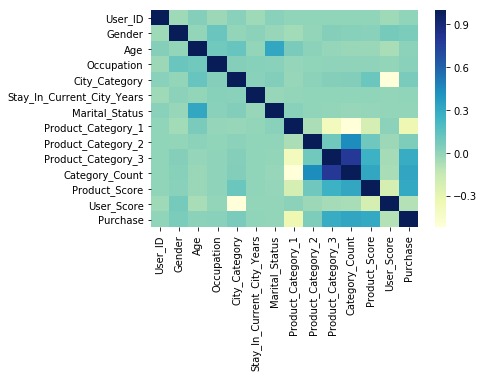

In [45]:
sns.heatmap(data=BlackFridayTrainNew.corr(), cmap="YlGnBu")

## 4. Data Modeling

In [74]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']
# importing the test dataset
BlackFridayTestNew = pd.read_csv('BlackFridayTestNew.csv')

In [75]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [63]:
BlackFridayTestNew.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,0,1000004,P00128942,1,4,7,1,2,1,1,11,0,2,0.478890,0.002262
1,1,1000009,P00113442,1,2,17,2,0,0,3,5,0,2,0.141134,0.061086
2,2,1000010,P00288442,0,3,1,1,4,1,5,14,0,2,0.090470,0.228507
3,3,1000010,P00145342,0,3,1,1,4,1,4,9,0,2,0.009650,0.228507
4,4,1000011,P00053842,0,2,1,2,1,0,4,5,12,3,0.258142,0.090498


In [58]:
X.shape

(550068, 13)

In [79]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)
x_test = BlackFridayTestNew.iloc[:,1:]

In [81]:
x_test.shape

(233599, 14)

### 4.1 Lasso Regression

In [82]:
# training the model with hyparameters alpha=0.3 and normalize=True
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X,y)

# outputs an array of purchase amounts
predictions = lassoReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

# output contains User_ID, Product_ID and Purchase, to be uploaded to get RMSE score
finalsolution.to_csv('finalsolution_Lasso.csv')

ValueError: could not convert string to float: 'P00316642'

## RMSE for Lasso Regression - 4526.5701

### 4.2 Ridge Regression

In [ ]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

# training the model with hyperparameters alpha=0.05 and normalize=True
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X,y)

# predicts the purchase amounts and outputs an array
predictions = ridgeReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

# output contains User_ID, Product_ID and Purchase, to be uploaded to get RMSE score
finalsolution.to_csv('finalsolution_Ridge.csv')

## RMSE Score for Ridge Regression - 4502.0546

### 4.3 Elastic Net Regression

In [ ]:
# training the model with hyperparameters alpha=1, l1_ratio=0.5 and normalize=True
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X,y)

# predicts the purchase amounts and outputs an array
predictions = ENreg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

# output contains User_ID, Product_ID and Purchase, to be uploaded to get RMSE score
finalsolution.to_csv('finalsolution_ElasticNet.csv')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [ ]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

## 4.4 Linear Regression

In [ ]:
# train the model with LinearRegression()
regr = linear_model.LinearRegression(normalize=True)

In [ ]:
regr

In [ ]:
regr.fit(X, y)

In [ ]:
BlackFridayTestNew = pd.read_csv('test.csv')

In [117]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [118]:
# predicts the purchase amounts and outputs an array
y_pred = regr.predict(x_test)

In [119]:
print(y_pred)

[11941.67597777  9526.76006103  7768.61145259 ... 10290.34879199
  6755.94473756  9251.68923478]


In [120]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [121]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.06417817e-02  4.93597272e+02  1.28775061e+02  4.95602548e+00
  6.42577596e+01  1.17810245e+01 -3.28594930e+01 -2.85961809e+02
 -2.97362471e+01  5.36814156e+01  6.51538822e+02  5.43162919e+03
 -8.91839891e+02]


In [122]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11941.675978
1,1000009,P00113442,9526.760061
2,1000010,P00288442,7768.611453
3,1000010,P00145342,7764.268785
4,1000011,P00053842,10584.738584


In [123]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [124]:
# write results to a csv, which can then be uploaded for RMSE score
finalsolution.to_csv('finalsolution_LinearRegression.csv')

## 4.5 Extra Trees Regression

In [24]:
# training the ExtraTrees regressor with n_estimators being 10
eTreeReg = ExtraTreesRegressor(n_estimators=10)
eTreeReg.fit(X,y)

# predicts the purchase amounts and outputs an array 
y_pred = eTreeReg.predict(x_test)

In [25]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [26]:
# write results to a csv, which can then be uploaded for RMSE score
finalsolution.to_csv('finalsolution_eTreeReg.csv')

## RMSE Score for Extra Trees Regressor - 2927.62

## 4.6 Random Forest Regression

In [6]:
# train the model with n_estimators=20
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X,y)

In [127]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [128]:
# predicts the purchase amounts and outputs an array 
y_pred = rf.predict(X_test)

In [129]:
print(y_pred)

[14699.  10272.1  6668.8 ...  7716.6 15127.3  2122.8]


In [130]:
BlackFridayTestNew['User_ID'].shape

(233599,)

In [131]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [132]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14699.0
1,1000009,P00113442,10272.1
2,1000010,P00288442,6668.8
3,1000010,P00145342,2340.0
4,1000011,P00053842,3161.9


In [133]:
# write results to a csv, which can then be uploaded for RMSE score
finalsolution.to_csv('finalsolution_RandomForest.csv')

## RMSE Score for Random Forest Regressor - 2914.72 

## Tensor Flow

In [134]:
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [135]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________


In [136]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [137]:
NN_model.fit(X, y, epochs=1, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)

Train on 440054 samples, validate on 110014 samples
Epoch 1/1


 42224/440054 [=>............................] - ETA: 9:34:15 - loss: 7736.2773 - mean_absolute_error: 7736.27 - ETA: 1:39:36 - loss: 5597.5719 - mean_absolute_error: 5597.57 - ETA: 23:00 - loss: 4851.0809 - mean_absolute_error: 4851.0809 - ETA: 13:25 - loss: 4674.0490 - mean_absolute_error: 4674.04 - ETA: 9:32 - loss: 4421.9194 - mean_absolute_error: 4421.9194 - ETA: 7:25 - loss: 4320.7949 - mean_absolute_error: 4320.794 - ETA: 6:15 - loss: 4251.4713 - mean_absolute_error: 4251.471 - ETA: 5:22 - loss: 4179.4057 - mean_absolute_error: 4179.405 - ETA: 4:46 - loss: 4180.8609 - mean_absolute_error: 4180.860 - ETA: 4:20 - loss: 4187.0441 - mean_absolute_error: 4187.044 - ETA: 4:01 - loss: 4187.8456 - mean_absolute_error: 4187.845 - ETA: 3:42 - loss: 4137.6603 - mean_absolute_error: 4137.660 - ETA: 3:28 - loss: 4113.4638 - mean_absolute_error: 4113.463 - ETA: 3:15 - loss: 4099.6650 - mean_absolute_error: 4099.665 - ETA: 3:06 - loss: 4103.6780 - mean_absolute_error: 4103.678 - ETA: 2:57 - lo

317232/440054 [====================>.........] - ETA: 25s - loss: 3926.0622 - mean_absolute_error: 3926.06 - ETA: 25s - loss: 3925.7940 - mean_absolute_error: 3925.79 - ETA: 25s - loss: 3925.9187 - mean_absolute_error: 3925.91 - ETA: 25s - loss: 3925.9242 - mean_absolute_error: 3925.92 - ETA: 25s - loss: 3925.7771 - mean_absolute_error: 3925.77 - ETA: 25s - loss: 3925.8655 - mean_absolute_error: 3925.86 - ETA: 25s - loss: 3925.8045 - mean_absolute_error: 3925.80 - ETA: 24s - loss: 3925.7362 - mean_absolute_error: 3925.73 - ETA: 24s - loss: 3925.6630 - mean_absolute_error: 3925.66 - ETA: 24s - loss: 3925.3886 - mean_absolute_error: 3925.38 - ETA: 24s - loss: 3925.1866 - mean_absolute_error: 3925.18 - ETA: 24s - loss: 3925.3568 - mean_absolute_error: 3925.35 - ETA: 24s - loss: 3925.3069 - mean_absolute_error: 3925.30 - ETA: 24s - loss: 3925.1614 - mean_absolute_error: 3925.16 - ETA: 24s - loss: 3925.1832 - mean_absolute_error: 3925.18 - ETA: 24s - loss: 3925.2159 - mean_absolute_error: 3

364736/440054 [=======================>......] - ETA: 19s - loss: 3925.5522 - mean_absolute_error: 3925.55 - ETA: 19s - loss: 3925.7412 - mean_absolute_error: 3925.74 - ETA: 19s - loss: 3925.3940 - mean_absolute_error: 3925.39 - ETA: 19s - loss: 3925.1011 - mean_absolute_error: 3925.10 - ETA: 19s - loss: 3925.1438 - mean_absolute_error: 3925.14 - ETA: 19s - loss: 3925.1507 - mean_absolute_error: 3925.15 - ETA: 18s - loss: 3925.3839 - mean_absolute_error: 3925.38 - ETA: 18s - loss: 3925.3759 - mean_absolute_error: 3925.37 - ETA: 18s - loss: 3925.4987 - mean_absolute_error: 3925.49 - ETA: 18s - loss: 3925.5010 - mean_absolute_error: 3925.50 - ETA: 18s - loss: 3925.6634 - mean_absolute_error: 3925.66 - ETA: 18s - loss: 3925.6931 - mean_absolute_error: 3925.69 - ETA: 18s - loss: 3925.7715 - mean_absolute_error: 3925.77 - ETA: 18s - loss: 3925.7583 - mean_absolute_error: 3925.75 - ETA: 18s - loss: 3925.8377 - mean_absolute_error: 3925.83 - ETA: 18s - loss: 3925.8859 - mean_absolute_error: 3

414688/440054 [===========================>..] - ETA: 11s - loss: 3920.8316 - mean_absolute_error: 3920.83 - ETA: 11s - loss: 3920.6682 - mean_absolute_error: 3920.66 - ETA: 11s - loss: 3920.7444 - mean_absolute_error: 3920.74 - ETA: 11s - loss: 3920.6148 - mean_absolute_error: 3920.61 - ETA: 11s - loss: 3920.5602 - mean_absolute_error: 3920.56 - ETA: 11s - loss: 3920.7911 - mean_absolute_error: 3920.79 - ETA: 11s - loss: 3920.5976 - mean_absolute_error: 3920.59 - ETA: 11s - loss: 3920.6442 - mean_absolute_error: 3920.64 - ETA: 11s - loss: 3920.3947 - mean_absolute_error: 3920.39 - ETA: 11s - loss: 3920.4899 - mean_absolute_error: 3920.48 - ETA: 11s - loss: 3920.6683 - mean_absolute_error: 3920.66 - ETA: 11s - loss: 3920.7530 - mean_absolute_error: 3920.75 - ETA: 10s - loss: 3920.6545 - mean_absolute_error: 3920.65 - ETA: 10s - loss: 3920.4656 - mean_absolute_error: 3920.46 - ETA: 10s - loss: 3920.5922 - mean_absolute_error: 3920.59 - ETA: 10s - loss: 3920.5356 - mean_absolute_error: 3

440016/440054 [============================>.] - ETA: 3s - loss: 3919.0131 - mean_absolute_error: 3919.013 - ETA: 3s - loss: 3918.9002 - mean_absolute_error: 3918.900 - ETA: 3s - loss: 3919.0814 - mean_absolute_error: 3919.081 - ETA: 3s - loss: 3919.0492 - mean_absolute_error: 3919.049 - ETA: 3s - loss: 3919.0501 - mean_absolute_error: 3919.050 - ETA: 3s - loss: 3919.0896 - mean_absolute_error: 3919.089 - ETA: 3s - loss: 3918.8765 - mean_absolute_error: 3918.876 - ETA: 3s - loss: 3918.8351 - mean_absolute_error: 3918.835 - ETA: 3s - loss: 3918.7888 - mean_absolute_error: 3918.788 - ETA: 3s - loss: 3918.5320 - mean_absolute_error: 3918.532 - ETA: 3s - loss: 3918.4707 - mean_absolute_error: 3918.470 - ETA: 3s - loss: 3918.5378 - mean_absolute_error: 3918.537 - ETA: 3s - loss: 3918.2520 - mean_absolute_error: 3918.252 - ETA: 3s - loss: 3918.1511 - mean_absolute_error: 3918.151 - ETA: 3s - loss: 3918.2170 - mean_absolute_error: 3918.217 - ETA: 2s - loss: 3918.2005 - mean_absolute_error: 39

In [23]:
# Load wights file of the best model :
wights_file = 'Weights-001--4165.78601.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

NameError: name 'NN_model' is not defined

In [ ]:
predictions = NN_model.predict(X_test)

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.to_csv('finalsolution_TensorFlow.csv')

## 4.7 Extreme Gradient Boosting (XGBoost)

In [101]:
import xgboost

In [102]:
# train the model with n_estimators=100 and max_depth=7
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Category_Count                550068 non-null int32
Product_Score                 550068 non-null float64
User_Score                    550068 non-null float64
dtypes: float64(2), int32(7), int64(4)
memory usage: 39.9 MB


In [104]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [105]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [106]:
# predicts the purchase amounts and outputs an array
predictions = xgb.predict(x_test)

In [107]:
xgboostsolution = BlackFridayTestNew[['User_ID','Product_ID']]
xgboostsolution['Purchase'] = predictions

In [108]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10438.294530
1,1000009,P00113442,9713.420537
2,1000010,P00288442,8728.293292
3,1000010,P00145342,9012.943524
4,1000011,P00053842,10880.052661


In [109]:
# write results to a csv, which can then be uploaded for RMSE score
xgboostsolution.to_csv('finalsolution_XGBoost.csv')

## RMSE Score for XGBoost - 2779.4812

## 4.8 Distributed Random Forest using H2O

In [73]:
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.192-b12, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l
  JVM stdout: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l\h2o_vivid_started_from_python.out
  JVM stderr: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l\h2o_vivid_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_vivid_fzd67x
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [74]:
train = h2o.import_file("BlackFridayTrainNew.csv")
test = h2o.import_file("BlackFridayTestNew.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [76]:
from h2o.automl import H2OAutoML

In [79]:
x = train.columns
y = 'Purchase'
x.remove('Purchase')

In [80]:
x

['C1',
 'User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score']

In [81]:
aml = H2OAutoML(max_models= 5, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [82]:
preds = aml.leader.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning:

Test/Validation dataset column 'Product_ID' has levels not trained on: [P00012642, P00013042, P00030342, P00038942, P00039042, P00042642, P00056942, P00058842, P00061642, P00062242, P00062542, P00063942, P00074942, P00077642, P00082142, P00082642, P00092742, P00100242, P00105742, P00106242, P00140842, P00156942, P00165542, P00166542, P00168242, P00172942, P00204642, P00227242, P00236842, P00239542, P00249942, P00253842, P00268942, P00270342, P00279042, P00294942, P00300142, P00306842, P00309842, P00312642, P00315342, P00322642, P00322842, P00336842, P00359842, P0099542]



In [88]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20181203_151940


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6532575.379125178
RMSE: 2555.8903300269317
MAE: 1897.4499153815755
RMSLE: NaN
Mean Residual Deviance: 6532575.379125178

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 6826208.214071142
RMSE: 2612.701325079302
MAE: 1938.8103352650348
RMSLE: NaN
Mean Residual Deviance: 6826208.214071142

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 6723164.146122221
RMSE: 2592.9065054726175
MAE: 1922.8079390311614
RMSLE: NaN
Mean Residual Deviance: 6723164.146122221
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1922.808,4.1943297,1933.6583,1916.7107,1920.0469,1924.2003,1919.4235
mean_residual_deviance,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
mse,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
r2,0.7332429,0.0010473,0.7315218,0.7348315,0.7343926,0.7313848,0.734084
residual_deviance,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
rmse,2592.8955,5.33433,2605.6821,2589.2986,2585.2725,2597.0508,2587.1738
rmsle,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-12-03 15:55:57,2 min 53.765 sec,0.0,5020.3211013,4067.9847648,25203623.9601907,5047.6884131,4090.1236340,25479158.3156621
,2018-12-03 15:55:58,2 min 55.024 sec,5.0,3880.9232210,3073.8307506,15061565.0473033,3907.3808312,3098.2221413,15267624.9603562
,2018-12-03 15:55:59,2 min 56.212 sec,10.0,3228.0604900,2491.4599094,10420374.5269248,3253.9278499,2513.8243903,10588046.4524495
,2018-12-03 15:56:01,2 min 57.393 sec,15.0,2978.4281829,2273.3338660,8871034.4408518,3004.3430179,2295.1264502,9026076.9691795
,2018-12-03 15:56:02,2 min 58.664 sec,20.0,2829.8676699,2143.5676036,8008151.0293037,2855.3498285,2164.0618579,8153022.6433340
---,---,---,---,---,---,---,---,---,---
,2018-12-03 15:56:22,3 min 18.633 sec,115.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:22,3 min 18.876 sec,120.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:22,3 min 19.114 sec,125.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:23,3 min 19.353 sec,130.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Product_Category_1,32603851718656.0000000,1.0,0.7702031
Product_Score,3225105989632.0000000,0.0989179,0.0761869
Product_ID,2815588040704.0000000,0.0863575,0.0665128
Product_Category_3,1271207428096.0000000,0.0389895,0.0300298
Product_Category_2,705914077184.0000000,0.0216512,0.0166759
User_Score,413632561152.0000000,0.0126866,0.0097713
C1,359006535680.0000000,0.0110112,0.0084808
User_ID,279450681344.0000000,0.0085711,0.0066015
Category_Count,178585583616.0000000,0.0054774,0.0042187
Occupation,141283786752.0000000,0.0043333,0.0033376


In [89]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_2_AutoML_20181203_151940,6.72316e+06,2592.91,6.72316e+06,1922.81,nan
GBM_1_AutoML_20181203_151940,6.8175e+06,2611.04,6.8175e+06,1936.83,nan
DRF_1_AutoML_20181203_151940,7.08744e+06,2662.22,7.08744e+06,1972.79,0.346743
StackedEnsemble_AllModels_AutoML_20181203_151940,7.12559e+06,2669.38,7.12559e+06,2005.89,0.426528
XRT_1_AutoML_20181203_151940,7.20138e+06,2683.54,7.20138e+06,1998.28,0.354257
StackedEnsemble_BestOfFamily_AutoML_20181203_151940,7.36988e+06,2714.75,7.36988e+06,2051.74,0.448205
GLM_grid_1_AutoML_20181203_151940_model_1,2.52033e+07,5020.29,2.52033e+07,4067.96,0.764076


In [83]:
y_pred = preds.as_data_frame()

In [84]:
y_pred.head()

,predict
0,16527.482427
1,11236.480297
2,6519.440419
3,2845.092719
4,2788.020899


In [85]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [86]:
# write results to a csv, which can then be uploaded for RMSE score
finalsolution.to_csv('finalsolution_H2O.csv')

## RMSE Score using H2O - 2662.3541